## 1. 获取数据

In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")    # datasets\test
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     # 创建目录
#     if not os.path.isdir(housing_path):
#         os.makedirs(housing_path)
#     tgz_path = os.path.join(housing_path, "housing.tgz")    # datasets\test\housing.tgz
#     # 将housing_url下载的文件保存到tgz_path路径
#     urllib.request.urlretrieve(housing_url, tgz_path)
#     housing_tgz = tarfile.open(tgz_path)
#     # 解压到housing_path路径
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close()
    
# fetch_housing_data()

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    housing_path = ''
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

In [3]:
housing.head()

,side,age,area,mortgage,subway,hospital,school,price,ocean_proximity
0,0,2014,59.19,1,0,1,1,13609,NEAR BAY
1,1,2014,158.72,1,1,1,1,15345,NEAR BAY
2,0,2011,87.08,1,0,1,1,13609,INLAND
3,1,2018,101.32,1,0,1,1,14486,INLAND
4,0,2012,78.89,0,0,1,1,13609,<1H OCEAN


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   side             234 non-null    int64  
 1   age              234 non-null    int64  
 2   area             234 non-null    float64
 3   mortgage         234 non-null    int64  
 4   subway           234 non-null    int64  
 5   hospital         234 non-null    int64  
 6   school           234 non-null    int64  
 7   price            234 non-null    int64  
 8   ocean_proximity  234 non-null    object 
dtypes: float64(1), int64(7), object(1)
memory usage: 16.6+ KB


In [5]:
housing.describe()

,side,age,area,mortgage,subway,hospital,school,price
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,0.645299,2011.329060,89.152906,0.598291,0.602564,0.927350,0.918803,14901.611111
std,0.479448,3.479963,34.613953,0.491295,0.490417,0.260117,0.273722,2363.524490
min,0.000000,2000.000000,26.740000,0.000000,0.000000,0.000000,0.000000,10429.000000
25%,0.000000,2010.000000,60.002500,0.000000,0.000000,1.000000,1.000000,13532.000000
50%,1.000000,2012.000000,88.365000,1.000000,1.000000,1.000000,1.000000,14437.000000
75%,1.000000,2013.750000,103.317500,1.000000,1.000000,1.000000,1.000000,15991.000000
max,1.000000,2019.000000,237.730000,1.000000,1.000000,1.000000,1.000000,29675.000000


array([[<AxesSubplot:title={'center':'side'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'mortgage'}>,
        <AxesSubplot:title={'center':'subway'}>,
        <AxesSubplot:title={'center':'hospital'}>],
       [<AxesSubplot:title={'center':'school'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

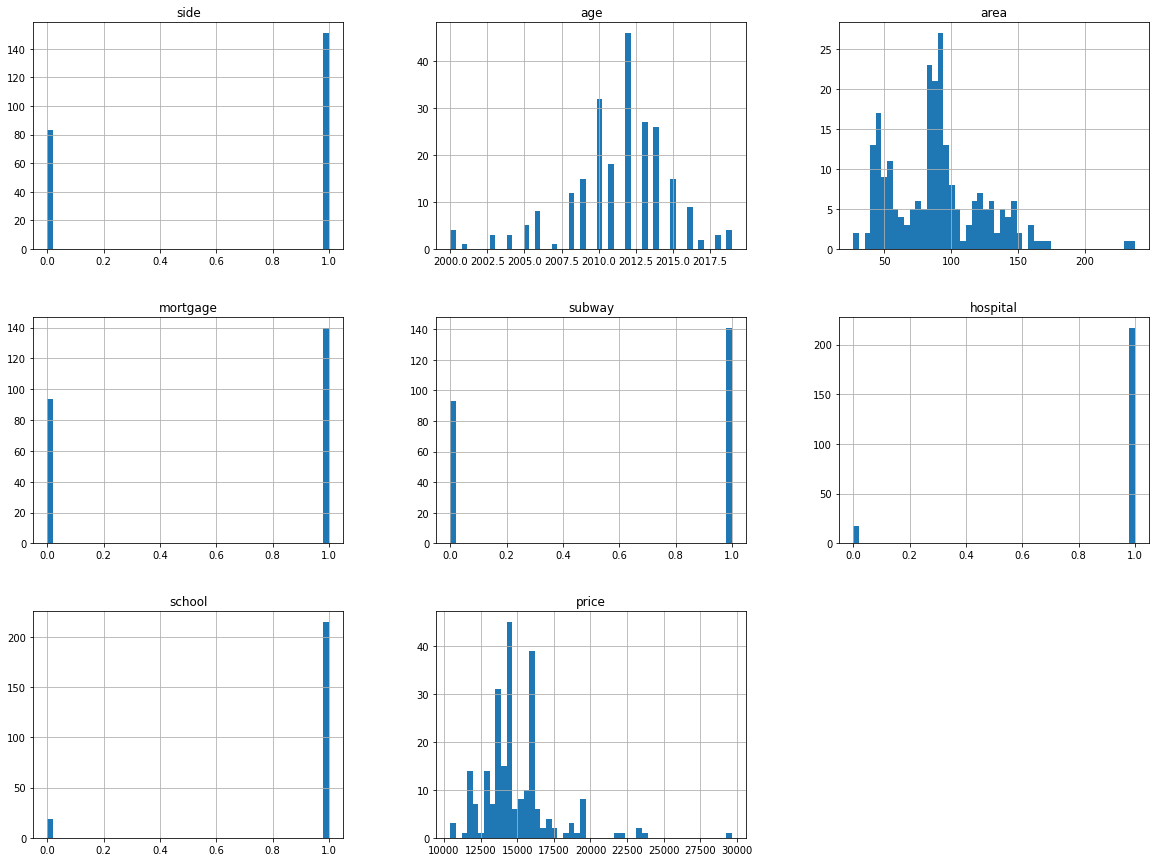

In [6]:
import matplotlib.pyplot as plt
# 绘制直方图
housing.hist(bins=50, figsize=(20,15))
# 保存图片
# plt.savefig("attribute_histogram_plots.png", dpi=300)

## 2. 划分测试集

<AxesSubplot:>

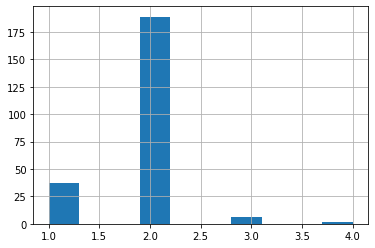

In [7]:
import numpy as np

housing["income_cat"] = pd.cut(housing["area"],
                               bins=[0., 50.0, 150.0, 200.0, 300., np.inf],
                               labels=[1, 2, 3, 4, 5])
# 根据income_cat数据绘制直方图                   
housing["income_cat"].hist()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

s = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in s.split(housing, housing["income_cat"]):
    # train_index: [17606 18632 14650 ... 13908 11159 15775]
    strat_train_set = housing.loc[train_index]
    # test_index: [5241 10970 20351 ...  4019 12107  2398]
    strat_test_set = housing.loc[test_index]

for dataset in (strat_train_set, strat_test_set):
    dataset.drop("income_cat", axis=1, inplace=True)
housing_train = strat_train_set.copy()

## 4.寻找相关性

In [9]:
corr_matrix = housing_train.corr()
corr_matrix 

,side,age,area,mortgage,subway,hospital,school,price
side,1.000000,-0.042690,0.492275,-0.038873,-0.225877,0.143046,0.007226,-0.070549
age,-0.042690,1.000000,-0.081916,0.201453,-0.209753,-0.144719,-0.129413,-0.021110
area,0.492275,-0.081916,1.000000,-0.133303,-0.194325,0.205655,-0.065820,-0.141331
mortgage,-0.038873,0.201453,-0.133303,1.000000,-0.121634,-0.148642,0.048018,-0.078757
subway,-0.225877,-0.209753,-0.194325,-0.121634,1.000000,-0.228689,0.365606,0.357103
hospital,0.143046,-0.144719,0.205655,-0.148642,-0.228689,1.000000,-0.083610,0.027700
school,0.007226,-0.129413,-0.065820,0.048018,0.365606,-0.083610,1.000000,0.169438
price,-0.070549,-0.021110,-0.141331,-0.078757,0.357103,0.027700,0.169438,1.000000


In [10]:
corr_matrix["price"].sort_values(ascending=False)

price       1.000000
subway      0.357103
school      0.169438
hospital    0.027700
age        -0.021110
side       -0.070549
mortgage   -0.078757
area       -0.141331
Name: price, dtype: float64

## 5. 属性组合

In [11]:
housing_train["age_per_area"] = housing_train["age"]/housing_train["area"]
housing_train["subway_per_age"] = housing_train["subway"]/housing_train["age"]
housing_train["hospital_per_area"]=housing_train["hospital"]/housing_train["area"]

# 计算相关矩阵
corr_matrix = housing_train.corr()
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
subway               0.357103
subway_per_age       0.356994
school               0.169438
hospital_per_area    0.169119
age_per_area         0.155492
hospital             0.027700
age                 -0.021110
side                -0.070549
mortgage            -0.078757
area                -0.141331
Name: price, dtype: float64

## 6. 数据处理
### 6.1 数据清洗

In [12]:
# 获取删除标签列后的数据集
housing = strat_train_set.drop("price", axis=1)
# 标签列
housing_labels = strat_train_set["price"].copy()

from sklearn.impute import SimpleImputer

# 创建SimpleImputer实例，设置中位数替换
imputer = SimpleImputer(strategy="median")
# 创建一个没有文本属性"ocean_proximity"的数据集
housing_num = housing.drop("ocean_proximity", axis=1)
# 将imputer实例适配到housing_num
imputer.fit(housing_num)
# 执行中位数替换缺失值的转化。
X = imputer.transform(housing_num)
# 将numpy数组转换成DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

### 6.2 处理文本和分类属性

In [13]:
# 注意：[["ocean_proximity"]]获得DataFrame类型的数据，因为后面需要对二维数据进行转化
housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
NEAR BAY           133
<1H OCEAN           27
INLAND              27
dtype: int64

In [14]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
# 拟合并转换
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.]])

In [15]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY'], dtype=object)]

In [16]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<187x3 sparse matrix of type '<class 'numpy.float64'>'
	with 187 stored elements in Compressed Sparse Row format>

In [17]:
housing_cat_1hot.toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

### 6.3 自定义转换器

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

# 选取列名
col_names = ["age", "subway", "hospital", "area"]
rooms_ix, bedrooms_ix, population_ix, households_ix = [housing.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        # 根据超参数add_bedrooms_per_room判断是否需要添加该组合属性
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# 将housing_extra_attribs从array转为DataFrame
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,side,age,area,mortgage,subway,hospital,school,ocean_proximity,rooms_per_household,population_per_household
210,0,2015,85.2,1,1,1,1,NEAR BAY,23.650235,0.011737
72,1,2012,103.19,0,0,1,0,INLAND,19.498013,0.009691
196,1,2008,90.01,1,0,1,1,NEAR BAY,22.308632,0.01111
30,1,2000,135.61,0,1,1,1,NEAR BAY,14.748175,0.007374
26,1,2009,92.95,1,1,1,1,NEAR BAY,21.613771,0.010758


### 6.4 流水线式数据转换

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
		# 中位数替换缺失值
        ('imputer', SimpleImputer(strategy="median")),
        # 添加组合属性
        ('attribs_adder', CombinedAttributesAdder()),
        # 归一化，统一量纲
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.32287566,  1.01576253, -0.11991245, ..., -0.24630801,
        -0.01682601,  0.83247193],
       [ 0.75592895,  0.15367058,  0.38618616, ..., -0.60516918,
        -0.35214689, -1.19522483],
       [ 0.75592895, -0.99578535,  0.01540352, ..., -0.36225775,
        -0.11960903, -1.19522483],
       ...,
       [ 0.75592895, -2.14524128,  2.17764585, ..., -1.25238683,
        -0.95817645,  0.843602  ],
       [-1.32287566,  0.44103456, -1.30118432, ...,  1.7359834 ,
        -1.94021462,  0.83448653],
       [ 0.75592895,  2.16521845,  0.39096864, ..., -0.60208761,
        -0.35475884, -1.19522483]])

In [20]:
from sklearn.compose import ColumnTransformer

# 获得数值列名称列表
num_attribs = list(housing_num)
# 获得类别列名称列表
cat_attribs = ["ocean_proximity"]

# 元组中的三个参数分别代表：名称（自定），转换器，以及一个该转换器能够应用的列名字（或索引）的列表
full_pipeline = ColumnTransformer([
		# 数值属性列转换器
        ("num", num_pipeline, num_attribs),
        # 文本属性列转换器
        ("cat", OneHotEncoder(), cat_attribs),
    ])
# 将ColumnTranformer应用到房屋数据
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.32287566,  1.01576253, -0.11991245, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.75592895,  0.15367058,  0.38618616, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.75592895, -0.99578535,  0.01540352, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.75592895, -2.14524128,  2.17764585, ...,  0.        ,
         0.        ,  1.        ],
       [-1.32287566,  0.44103456, -1.30118432, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.75592895,  2.16521845,  0.39096864, ...,  0.        ,
         0.        ,  1.        ]])

## 7. 选择和训练模型
### 7.1 训练和评估训练集

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
# 模型训练
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [22]:
# 在几个训练实例上应用完整的预处理
some_data = housing.iloc[:5]    # 测试集
some_labels = housing_labels.iloc[:5]    # 测试标签
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [15498.80820699 13634.56692837 13675.10736739 14422.16230125
 15309.33017777]
Labels: [13447, 13532, 11695, 14176, 14437]


In [23]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
# 均方误差
lin_mse = mean_squared_error(housing_labels, housing_predictions)
# 均方根误差
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2082.1340509050615

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
# 模型训练
tree_reg.fit(housing_prepared, housing_labels)
# 模型预测
housing_predictions = tree_reg.predict(housing_prepared)
# 均方误差
tree_mse = mean_squared_error(housing_labels, housing_predictions)
# 均方根误差
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### 7.2 使用交叉验证来更好地进行评估

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(temp_scores):
    print("Scores:", temp_scores)
    print("Mean:", temp_scores.mean())
    print("Standard deviation:", temp_scores.std())

display_scores(tree_rmse_scores)

Scores: [2696.92465207 3090.82861484 3247.75706409 1932.67709068 2588.42584758
 2103.57700371 1274.08706222 2982.53293732 2556.91863165 5565.71379569]
Mean: 2803.9442699856218
Standard deviation: 1079.2378878329357


In [26]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1312.5313069  3072.42301729 4186.64851997 1704.5192884  1630.29975465
 1205.18531219 1544.34466809 1923.07478384 2265.5271937  2139.58510752]
Mean: 2098.4138952566113
Standard deviation: 864.0907711351614


In [27]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

824.4543285379244

In [28]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [1768.77310903 2886.35364123 4025.7247725  1733.12822549 1877.73611522
 1374.30447252 1429.98785785 2456.21214984 2106.50616852 3177.32250596]
Mean: 2283.6049018153835
Standard deviation: 809.1026642210363


## 8. 微调模型
### 8.1 网格搜索

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 尝试3×4=12种超参数组合
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # 之后设置bootstrap=False，再尝试2×3=6种超参数组合
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 训练5次，总共（12+6）×5=90次
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 3}

In [31]:
param_grid = [
    {'n_estimators': [30, 50, 70, 90], 'max_features': [7, 8, 9]},
  ]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 9, 'n_estimators': 30}

In [32]:
grid_search.best_estimator_

RandomForestRegressor(max_features=9, n_estimators=30, random_state=42)

In [33]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2332.1485637637466 {'max_features': 7, 'n_estimators': 30}
2342.1291544715837 {'max_features': 7, 'n_estimators': 50}
2368.9976730364697 {'max_features': 7, 'n_estimators': 70}
2372.9458698833278 {'max_features': 7, 'n_estimators': 90}
2324.264881857529 {'max_features': 8, 'n_estimators': 30}
2346.2172646069193 {'max_features': 8, 'n_estimators': 50}
2377.218058058912 {'max_features': 8, 'n_estimators': 70}
2370.1128525633153 {'max_features': 8, 'n_estimators': 90}
2293.3104758963996 {'max_features': 9, 'n_estimators': 30}
2306.1898565866018 {'max_features': 9, 'n_estimators': 50}
2333.5564182907556 {'max_features': 9, 'n_estimators': 70}
2352.1435040466285 {'max_features': 9, 'n_estimators': 90}


### 8.2 随机搜索

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_distribs = {
        # 均匀离散随机变量
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=7, high=9),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028025348A00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028025348E20>},
                   random_state=42, scoring='neg_mean_squared_error')

In [35]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2337.412013932236 {'max_features': 7, 'n_estimators': 180}
2360.251209549564 {'max_features': 7, 'n_estimators': 15}
2376.037667737318 {'max_features': 7, 'n_estimators': 72}
2303.345674824504 {'max_features': 7, 'n_estimators': 21}
2364.2066105947038 {'max_features': 7, 'n_estimators': 122}
2380.5766232411556 {'max_features': 7, 'n_estimators': 75}
2379.342679118329 {'max_features': 7, 'n_estimators': 88}
2375.6879969229185 {'max_features': 7, 'n_estimators': 100}
2351.652921050932 {'max_features': 8, 'n_estimators': 152}
2349.14487007899 {'max_features': 7, 'n_estimators': 150}


### 8.3 分析最佳模型及其误差

In [36]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.01481082, 0.16738452, 0.16858267, 0.01739427, 0.06390065,
       0.00097824, 0.00253843, 0.15253491, 0.15373185, 0.20635508,
       0.02407563, 0.00444491, 0.02326803])

In [37]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# cat_encoder: OneHotEncoder()
cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs: ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.20635507666512087, 'bedrooms_per_room'),
 (0.16858266857115775, 'area'),
 (0.16738451709994648, 'age'),
 (0.15373185115009866, 'pop_per_hhold'),
 (0.152534912724574, 'rooms_per_hhold'),
 (0.06390064616694141, 'subway'),
 (0.024075629646617237, '<1H OCEAN'),
 (0.02326802659750273, 'NEAR BAY'),
 (0.017394269957458144, 'mortgage'),
 (0.014810823092284564, 'side'),
 (0.004444910218188754, 'INLAND'),
 (0.0025384282721995625, 'school'),
 (0.0009782398379098302, 'hospital')]

### 8.4 通过测试集评估系统

In [38]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

# 数据处理
X_test_prepared = full_pipeline.transform(X_test)
# 模型预测
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2659.989329317014

In [39]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1303.50753617, 3528.73271407])

In [51]:
side = 0
age = 2010
area = 59.19
mortgage = 1
subway = 1
hospital = 1
school = 1
ocean_proximity = 'NEAR BAY'
final_pre = {'side':side,'age':age,'area':area,'mortgage':mortgage,'subway':subway,'hospital':hospital,'school':school,
             'ocean_proximity':ocean_proximity}
final_pre = pd.DataFrame(final_pre,index=[0])
X_test_prepared = full_pipeline.transform(final_pre)
final_predictions = final_model.predict(X_test_prepared)
final_predictions[0]

15192.266666666666